# DH140 Individual Assignment: Data Exploration

 by Pawan (Sine) Polcharoen
 
 In this assignment, I will be exploring a spatial data set containing information on NYC Subway Stops. The data set is generated from the static data developer feeds published by the MTA. Released in November 2020, the data represents normal service that resumed following the height of the first wave of the COVID-19 pandemic in spring 2020. Using the `geopandas` library and various commands, I will be exploring the structure of the data set and what information it holds.

### Loading the Data
First, I am starting by importing a new module `geopandas`.

In [9]:
import geopandas as gpd

Next, I am importing my data and setting it to the object `subway`. It is a shapefile downloaded from [here](https://www.baruch.cuny.edu/confluence/pages/viewpage.action?pageId=28016896).

In [46]:
subway = gpd.read_file('data/stops_nyc_subway_nov2020.shp')

### Understanding the Data Set
What's the data type? I will use the `type` command to find out.

In [47]:
type(subway)

geopandas.geodataframe.GeoDataFrame

It is a data frame!

How many observations and variables are there? I will use the `shape` command to find out.

In [48]:
subway.shape

(493, 10)

493 observations and 10 variables.

I am now using the command `info` to get more information on the data frame.

In [50]:
subway.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   stop_id    493 non-null    object  
 1   stop_name  493 non-null    object  
 2   stop_lat   493 non-null    float64 
 3   stop_lon   493 non-null    float64 
 4   trains     493 non-null    object  
 5   structure  493 non-null    object  
 6   stop_id2   4 non-null      object  
 7   GEOID      493 non-null    object  
 8   NAMELSAD   493 non-null    object  
 9   geometry   493 non-null    geometry
dtypes: float64(2), geometry(1), object(7)
memory usage: 38.6+ KB


Remembering that pandas datatypes are slightly different from raw python datatypes, I now know that the data currently contains strings (objects) and floats (float64). Furthermore, that command gave me a concise outline of all the variables contained in the data set, as well as how many observations are in each column, and their data type.

Next, I am using the `head` and `tail` commands to see the first and last five rows of the data set, respectively.

In [51]:
subway.head()

,stop_id,stop_name,stop_lat,stop_lon,trains,structure,stop_id2,GEOID,NAMELSAD,geometry
0,101,Van Cortlandt Park - 242 St,40.889248,-73.898583,1,Elevated,None,36005,Bronx County,POINT (1012291.156 263271.208)
1,103,238 St,40.884667,-73.900870,1,Elevated,None,36005,Bronx County,POINT (1011660.704 261601.442)
2,104,231 St,40.878856,-73.904834,1,Elevated,None,36005,Bronx County,POINT (1010566.908 259483.047)
3,201,Wakefield - 241 St,40.903125,-73.850620,2,Elevated,None,36005,Bronx County,POINT (1025543.988 268346.146)
4,204,Nereid Av,40.898379,-73.854376,2 5,Elevated,None,36005,Bronx County,POINT (1024508.570 266615.236)


In [52]:
subway.tail()

,stop_id,stop_name,stop_lat,stop_lon,trains,structure,stop_id2,GEOID,NAMELSAD,geometry
488,S27,Grasmere,40.603117,-74.084087,SIR,Open Cut,None,36085,Richmond County,POINT (960900.408 159019.390)
489,S28,Clifton,40.621319,-74.071402,SIR,Elevated,None,36085,Richmond County,POINT (964428.231 165647.725)
490,S29,Stapleton,40.627915,-74.075162,SIR,Elevated,None,36085,Richmond County,POINT (963386.487 168051.695)
491,S30,Tompkinsville,40.636949,-74.074835,SIR,At Grade,None,36085,Richmond County,POINT (963480.067 171342.945)
492,S31,St George,40.643748,-74.073643,SIR,Open Cut,None,36085,Richmond County,POINT (963812.981 173819.724)


From these glimpses into the data frame, I am able to better understand the structure of the data, as well as see  what specific observations look like. 

### Data Exploration
First, I am extracting all values for a single column, `NAMELSAD`, using brackets.

In [63]:
subway['NAMELSAD']

0         Bronx County
1         Bronx County
2         Bronx County
3         Bronx County
4         Bronx County
            ...       
488    Richmond County
489    Richmond County
490    Richmond County
491    Richmond County
492    Richmond County
Name: NAMELSAD, Length: 493, dtype: object

The output of that command gave me all values within the column names 'NAMELSAD'. I can see that they are counties within NYC.

Next, I will use `value_counts` command to see how many stops there are for each county.

In [62]:
subway['NAMELSAD'].value_counts()

Kings County       169
New York County    151
Queens County       82
Bronx County        70
Richmond County     21
Name: NAMELSAD, dtype: int64

The output shows me how many stops there are within each county included in the data set.

I will now run a query to filter the data so that only observations within Queens County are shown.

In [65]:
subway.query("NAMELSAD == 'Queens County'")

,stop_id,stop_name,stop_lat,stop_lon,trains,structure,stop_id2,GEOID,NAMELSAD,geometry
390,701,Flushing - Main St,40.759600,-73.830030,7,Subway,None,36081,Queens County,POINT (1031337.260 216065.161)
391,702,Mets - Willets Point,40.754622,-73.845625,7,Elevated,None,36081,Queens County,POINT (1027020.134 214243.518)
392,705,111 St,40.751730,-73.855334,7,Elevated,None,36081,Queens County,POINT (1024331.965 213185.279)
393,706,103 St - Corona Plaza,40.749865,-73.862700,7,Elevated,None,36081,Queens County,POINT (1022292.167 212502.515)
394,707,Junction Blvd,40.749145,-73.869527,7,Elevated,None,36081,Queens County,POINT (1020400.979 212237.305)
...,...,...,...,...,...,...,...,...,...,...
467,R03,Astoria Blvd,40.770258,-73.917843,N W,Elevated,None,36081,Queens County,POINT (1007006.550 219913.211)
468,R04,30 Av,40.766779,-73.921479,N W,Elevated,None,36081,Queens County,POINT (1006000.556 218644.773)
469,R05,Broadway,40.761820,-73.925508,N W,Elevated,None,36081,Queens County,POINT (1004886.048 216837.071)
470,R06,36 Av,40.756804,-73.929575,N W,Elevated,None,36081,Queens County,POINT (1003760.862 215008.647)


Thus, I obtained a resulting data frame containing only subway stops within Queens County.

### Data Visualization

First, I am creating a basic plot using the `plot` command.

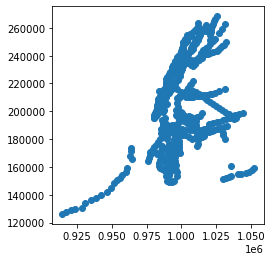

In [76]:
subway.plot()

The `plot` command gave a simple initial visual using the following `geometry` column within the shapefile.

I can see these values by extracting the variable from the data set.

In [77]:
subway.geometry

0      POINT (1012291.156 263271.208)
1      POINT (1011660.704 261601.442)
2      POINT (1010566.908 259483.047)
3      POINT (1025543.988 268346.146)
4      POINT (1024508.570 266615.236)
                    ...              
488     POINT (960900.408 159019.390)
489     POINT (964428.231 165647.725)
490     POINT (963386.487 168051.695)
491     POINT (963480.067 171342.945)
492     POINT (963812.981 173819.724)
Name: geometry, Length: 493, dtype: geometry

Using `plot` again, I will add additional arguments to create a more informational and prettier plot. I will be changing the size, color coding the points by the variable `NAMELSAD`, and adding a legend.

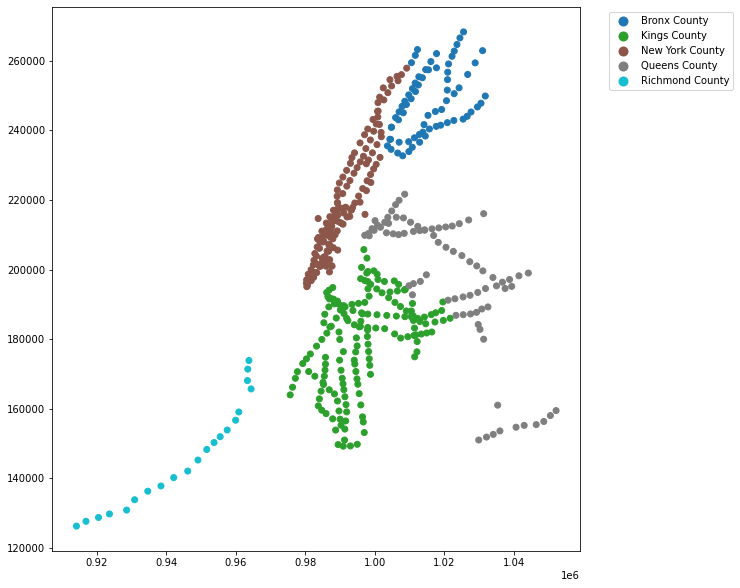

In [87]:
subway.plot(
            figsize=(20,10),
            column = 'NAMELSAD', 
            legend = True,             
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)}) 

This gives us a better data visualization with more information included. Not only are we seeing how the stops are spread throughout NYC, but also how they are split up by county.